<a href="https://colab.research.google.com/github/ebagdasa/federated/blob/master/analytics/location_heatmaps/dp_location_heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ebagdasa/federated.git

Cloning into 'federated'...
remote: Enumerating objects: 2781, done.
remote: Counting objects: 100% (427/427), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 2781 (delta 329), reused 338 (delta 286), pack-reused 2354
Receiving objects: 100% (2781/2781), 1.86 MiB | 5.13 MiB/s, done.
Resolving deltas: 100% (1938/1938), done.


In [2]:
!cd federated && git checkout master && git pull

Already on 'master'
Your branch is up to date with 'origin/master'.
Already up to date.


In [3]:
!pip install torch
!pip install matplotlib
!pip install tqdm
!pip install pygtrie

  Created wheel for pygtrie: filename=pygtrie-2.4.2-cp37-none-any.whl size=19063 sha256=a88c82ba7de1f5c2128007b0d40b53963c87abc12885e47a8bff54fb45971689
  Stored in directory: /root/.cache/pip/wheels/db/57/91/73782136379fe419036c5ec0e4070d8b3a35f2a36bd6a94ed8
Successfully built pygtrie


In [8]:
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm

In [7]:
import sys
sys.path.insert(1, "federated/analytics/location_heatmaps")

In [9]:
from run_experiment import *
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm
import geo_utils
import metrics
import mechanisms

In [11]:
# !wget https://static01.nyt.com/images/2018/12/14/business/10location-insider/10location-promo-superJumbo-v2.jpg
!wget https://www.cs.cornell.edu/~eugene/assets/images/location_heatmap.jpg

--2021-07-02 03:02:49--  https://www.cs.cornell.edu/~eugene/assets/images/location_heatmap.jpg
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924651 (4.7M) [image/jpeg]
Saving to: ‘location_heatmap.jpg’

location_heatmap.jp 100%[===================>]   4.70M  7.73MB/s    in 0.6s    

2021-07-02 03:02:50 (7.73 MB/s) - ‘location_heatmap.jpg’ saved [4924651/4924651]



In [12]:
true_image, dataset = get_data('location_heatmap.jpg')

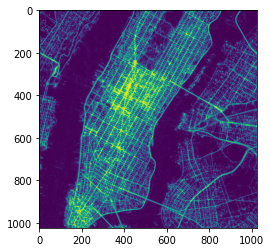

In [13]:
plt.imshow(true_image)

### No DP

positivity: False
Total of 1000.0 SecAgg rounds per level


  1%|          | 830/100000 [00:00<00:11, 8293.48it/s]

Level: 0. Eps: None. Threshold: -100000.00. Remaining: 0.00


  1%|          | 817/100000 [00:00<00:12, 8156.67it/s]

Level: 0. MSE: 1.09e-11, without sampling error: 1.35e-12.
Level: 1. Eps: None. Threshold: -100000.00. Remaining: 0.00


  1%|          | 857/100000 [00:00<00:11, 8568.50it/s]

Level: 1. MSE: 1.07e-11, without sampling error: 1.09e-12.
Level: 2. Eps: None. Threshold: -100000.00. Remaining: 0.00


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 2. MSE: 1.05e-11, without sampling error: 8.79e-13.
Level: 3. Eps: None. Threshold: -100000.00. Remaining: 0.00


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 3. MSE: 1.03e-11, without sampling error: 7.63e-13.
Level: 4. Eps: None. Threshold: -100000.00. Remaining: 0.00


Level: 4. MSE: 1.03e-11, without sampling error: 6.91e-13.
Total epsilon-users: 0.00 with 0.00 eps per person. 


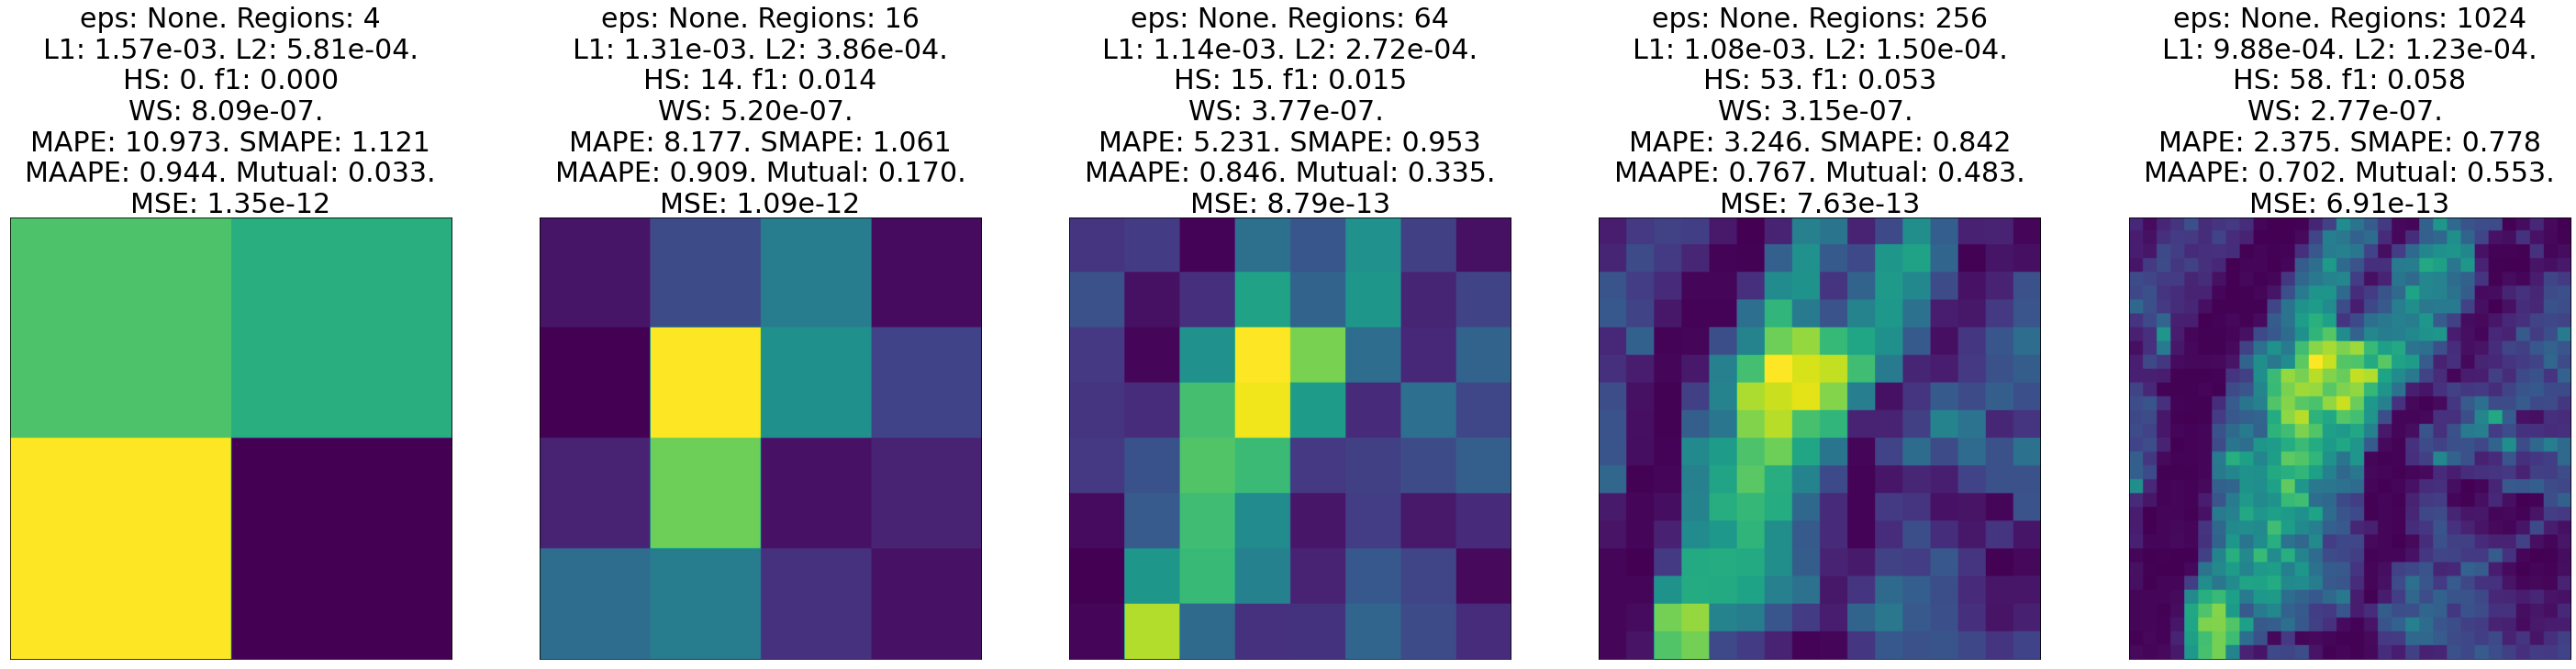

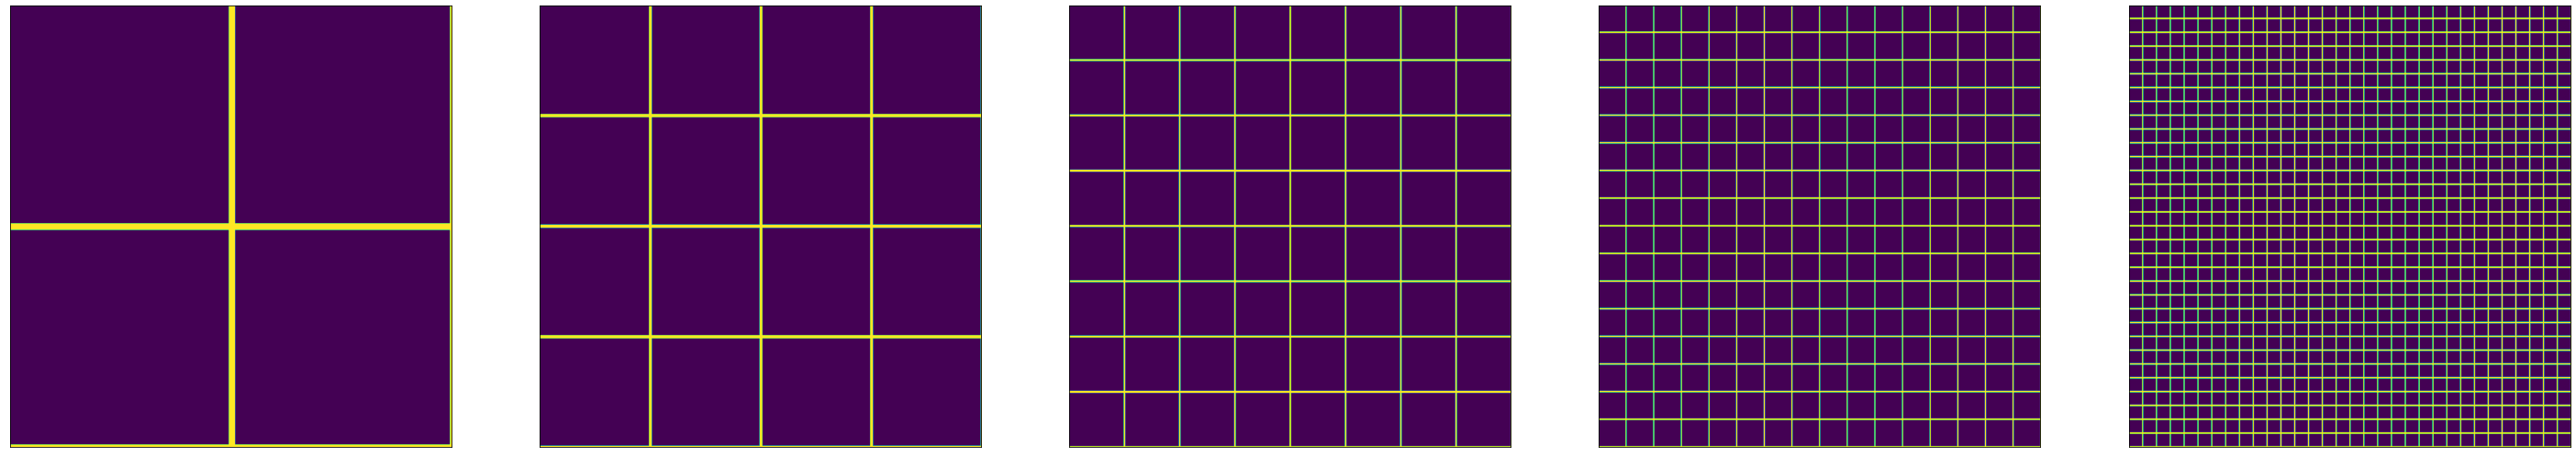

In [14]:
users = 100000
secagg_size = 100
c = secagg_size / users
res10 = run_experiment(true_image,
                   dataset,
                   level_sample_size=users,
                   secagg_round_size=secagg_size,
                   eps_func=lambda x, num_regions: None,
                   threshold=-100000,
                   top_k=TOPK,
                   partial=1,
                   max_levels=5,
                   total_size=TOTAL_SIZE,
                   min_dp_size=None,
                   dropout_rate=None,
                   output_flag=True,
                   quantize=None,
                   save_gif=False,
                   positivity=False, start_with_level=-1,
                   last_result_ci=False)

In [10]:
true_image.var()

4351.288956855748

## Algorithm 2

positivity: False
Total of 10.0 SecAgg rounds per level


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 0. Eps: 0.003577706855891111. Threshold: 10.00. Remaining: 1.00


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 0. MSE: 1.09e-11, without sampling error: 1.35e-12.
Level: 1. Eps: 0.014310712939686405. Threshold: 10.00. Remaining: 1.00


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 1. MSE: 1.07e-11, without sampling error: 1.10e-12.
Level: 2. Eps: 0.05723552747969013. Threshold: 10.00. Remaining: 0.98


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 2. MSE: 1.05e-11, without sampling error: 8.82e-13.
Level: 3. Eps: 0.22847608844135425. Threshold: 10.00. Remaining: 0.92


Level: 3. MSE: 1.03e-11, without sampling error: 7.66e-13.


  0%|          | 201/100000 [00:00<01:04, 1557.40it/s]

Last round. Spending remaining epsilon budget: 69639.9964283378
Level: 4. Eps: 0.696399964283378. Threshold: 10.00. Remaining: 0.70


Level: 4. MSE: 1.03e-11, without sampling error: 6.99e-13.
Total epsilon-users: 100000.00 with 1.00 eps per person. 


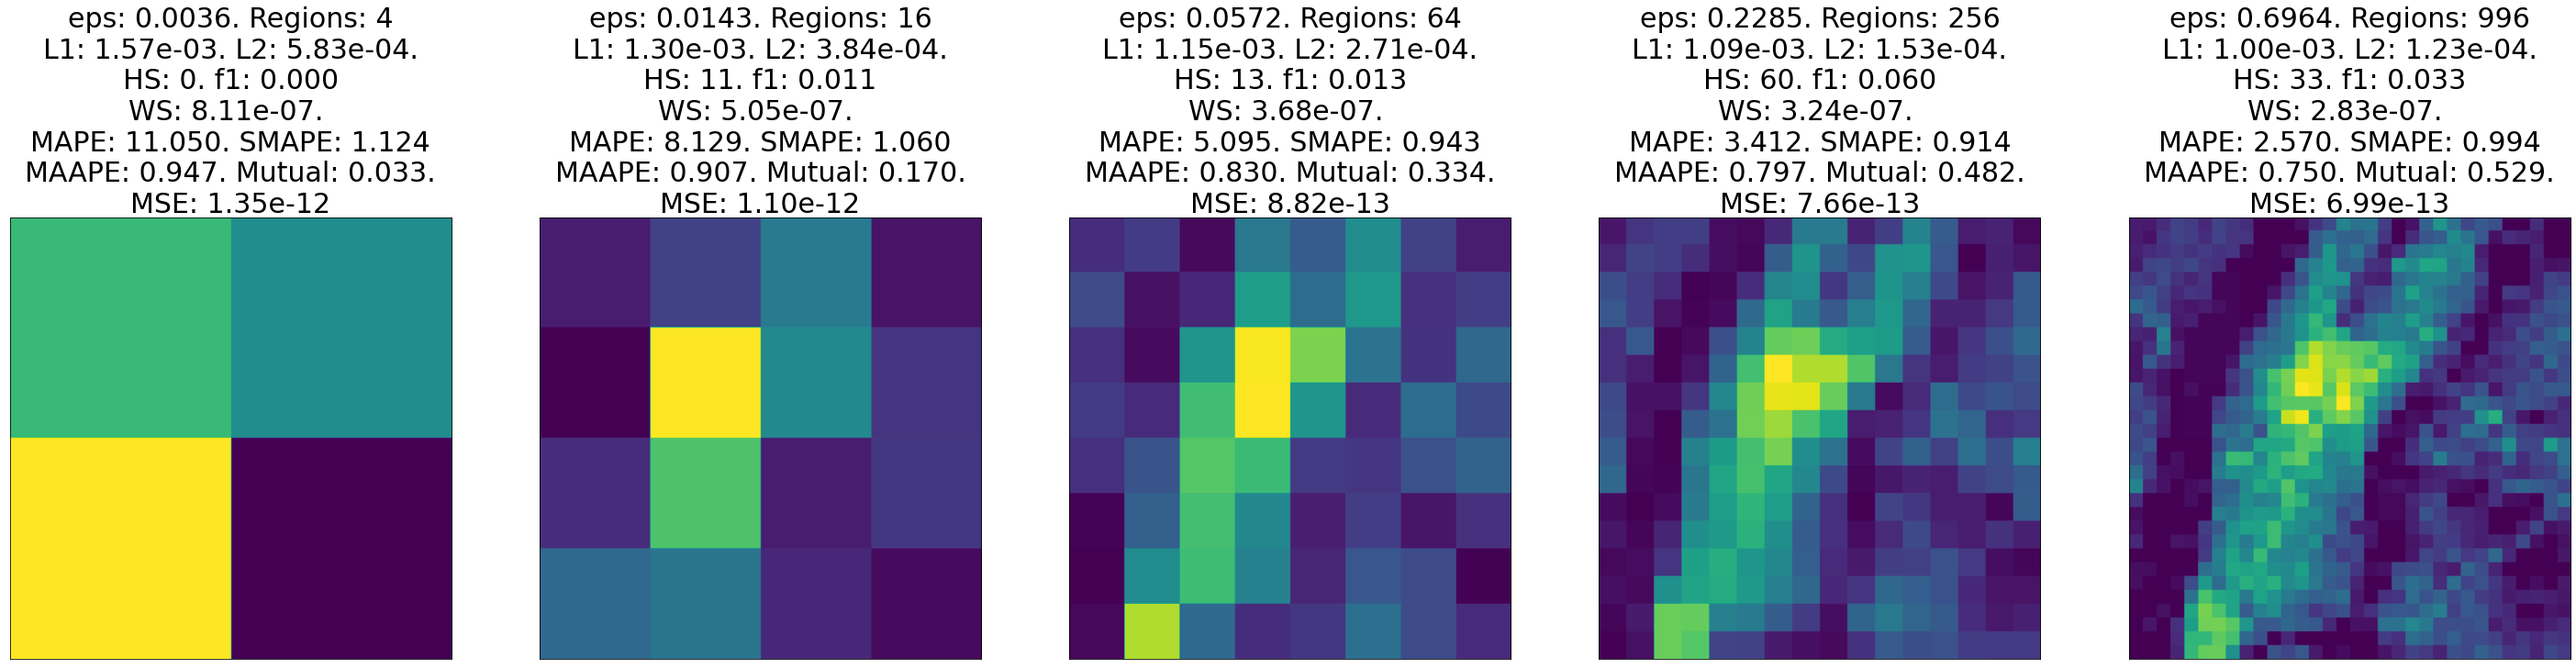

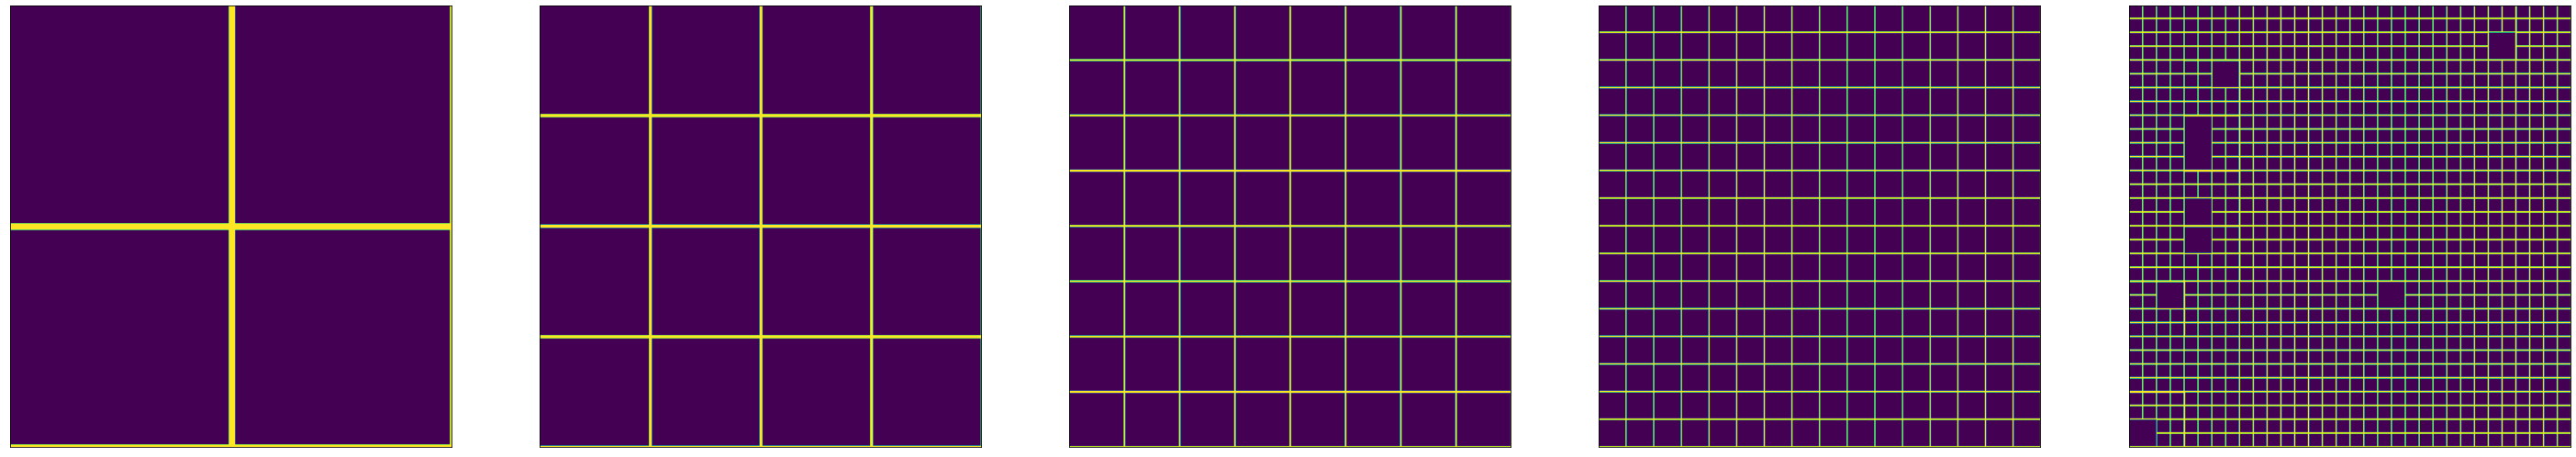

In [15]:
users = 100000
secagg_size = 10000
c = 1/10
res10 = run_experiment(true_image,
                   dataset,
                   level_sample_size=users,
                   secagg_round_size=secagg_size,
                   eps_func=lambda x, num_regions: mechanisms.get_eps_from_two_std(c * np.sqrt(secagg_size / users) * users/num_regions),
                   threshold_func=lambda i, prefix_len, eps, remaining: 10,
                   collapse_func=lambda threshold: max(5, 1/4 * threshold),
                       total_epsilon_budget=1*users,
                   top_k=TOPK,
                   partial=100,
                   max_levels=10,
                   total_size=TOTAL_SIZE,
                   min_dp_size=9000,
                   dropout_rate=0.1,
                   output_flag=True,
                   quantize=None,
                   save_gif=False,
                   positivity=False, start_with_level=-1,
                   last_result_ci=False)


positivity: False
Total of 10.0 SecAgg rounds per level


  1%|          | 1056/100000 [00:00<00:09, 10556.46it/s]

Level: 0. Eps: 0.003577706855891111. Threshold: 2500.00. Remaining: 1.00


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 0. MSE: 1.09e-11, without sampling error: 1.35e-12.
Level: 1. Eps: 0.014310712939686405. Threshold: 625.00. Remaining: 1.00


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 1. MSE: 1.07e-11, without sampling error: 1.09e-12.
Level: 2. Eps: 0.05723552747969013. Threshold: 156.25. Remaining: 0.98


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 2. MSE: 1.04e-11, without sampling error: 8.82e-13.
Level: 3. Eps: 0.2231435513142097. Threshold: 40.00. Remaining: 0.92


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 3. MSE: 1.03e-11, without sampling error: 7.66e-13.
Last round. Spending remaining epsilon budget: 70173.25014105227
Level: 4. Eps: 0.7017325014105227. Threshold: 12.49. Remaining: 0.70


Level: 4. MSE: 1.02e-11, without sampling error: 6.95e-13.
Total epsilon-users: 100000.00 with 1.00 eps per person. 


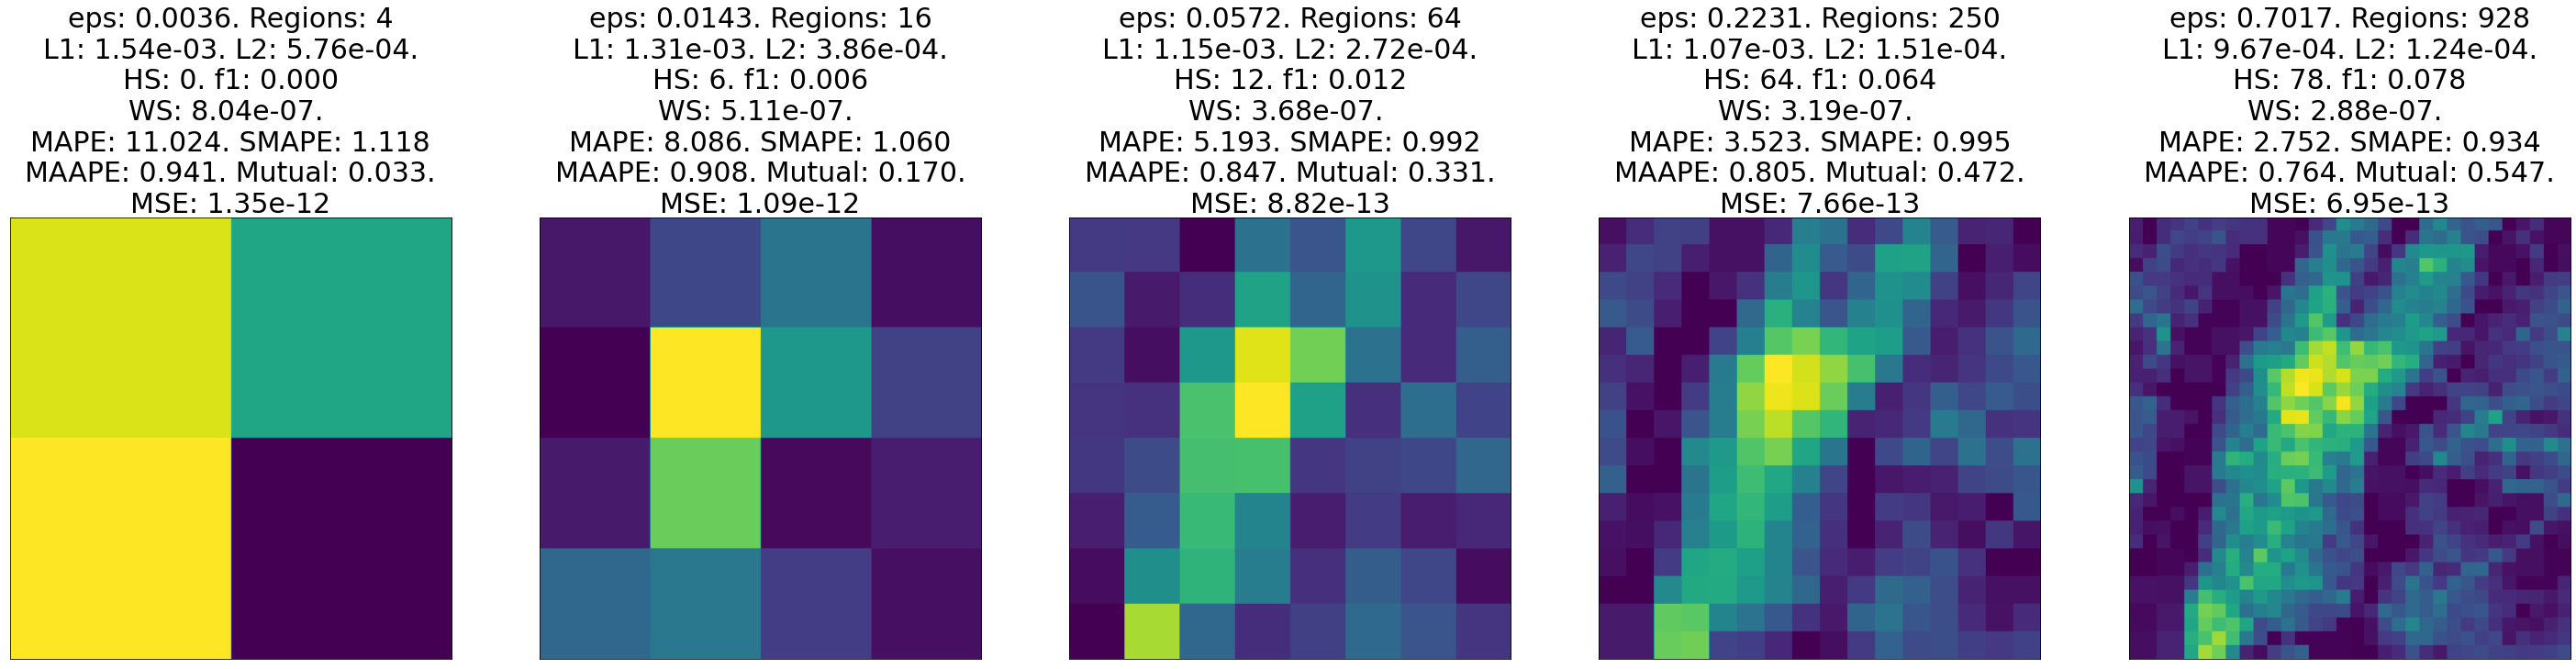

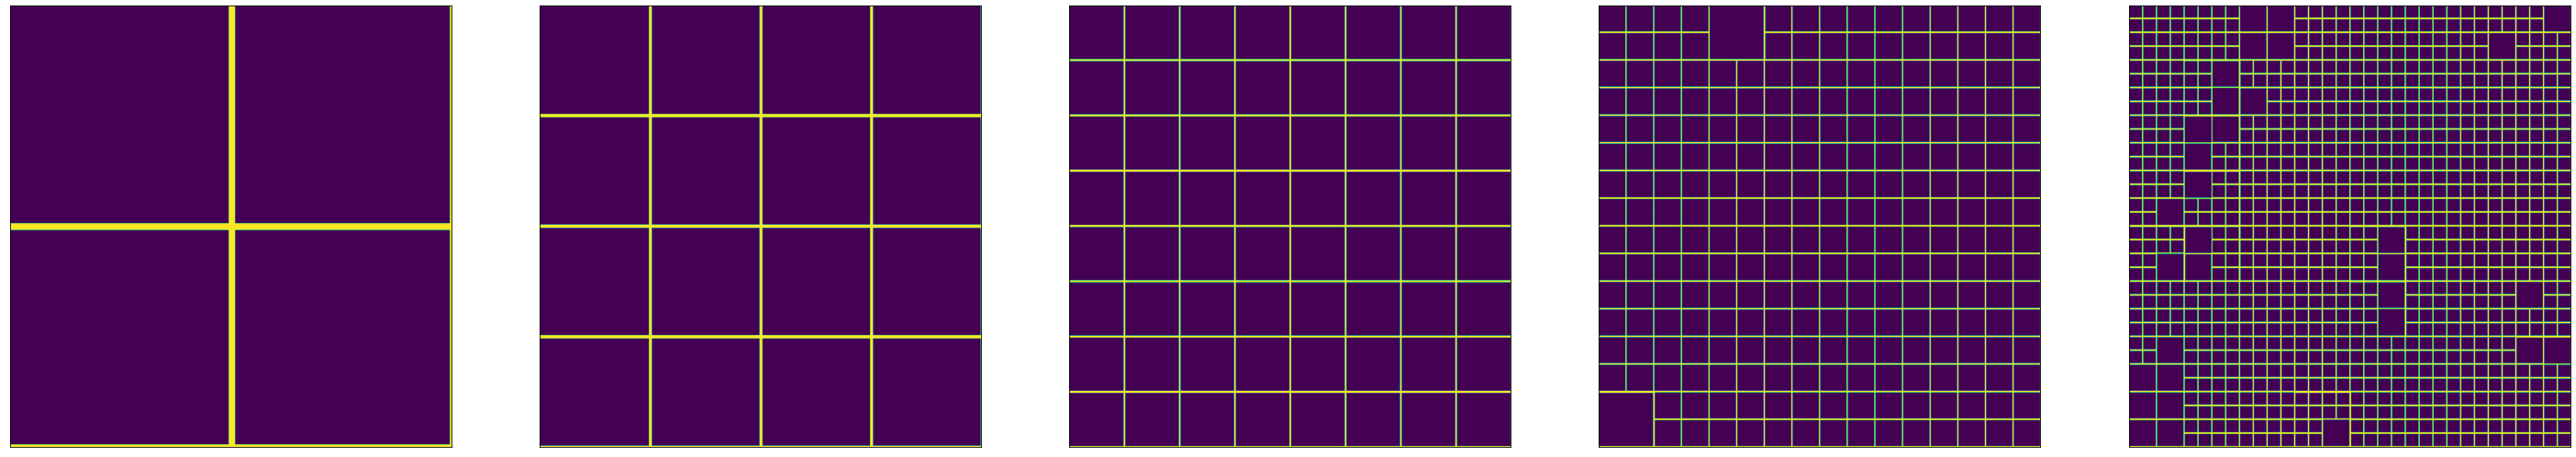

In [17]:
users = 100000
secagg_size = 10000
c = 1/10
res10 = run_experiment(true_image,
                   dataset,
                   level_sample_size=users,
                   secagg_round_size=secagg_size,
                   eps_func=lambda x, num_regions: mechanisms.get_eps_from_two_std(c * np.sqrt(secagg_size / users) * users/num_regions),
                   threshold_func=lambda i, prefix_len, eps, remaining: 2 / np.sqrt(secagg_size / users) * mechanisms.get_std_from_eps( eps),
                   collapse_func=lambda threshold: max(5, 1/4 * threshold),
                       total_epsilon_budget=1*users,
                   top_k=TOPK,
                   partial=100,
                   max_levels=10,
                   total_size=TOTAL_SIZE,
                   min_dp_size=9000,
                   dropout_rate=0.1,
                   output_flag=True,
                   quantize=None,
                   save_gif=False,
                   positivity=False, start_with_level=-1,
                   last_result_ci=False)


# Adding more data

In [9]:
split_dataset = geo_utils.makeGaussian(true_image, 1024, 500, [200, 900], convert=True, save=True, load=False)


100%|██████████| 1024/1024 [00:17<00:00, 58.57it/s] 


Saved to split_dataset_500_200_900.pt


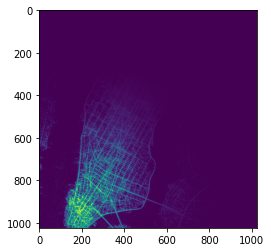

In [11]:
plt.imshow(split_dataset['pos_image'])

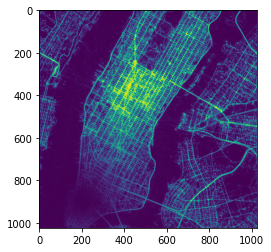

In [12]:
plt.imshow(split_dataset['neg_image'])